# Creating and accessing a fit
This example shows you, how you can easily calculate and visualize a fit to your data

In [1]:
import numpy as np
import xarray as xr
import psyplot.project as psy
%matplotlib inline
%config InlineBackend.close_figures = False

First we start with some example data to make a linear regression from the equation
``y(x) = 4 * x + 30``

In [2]:
x = np.linspace(0, 100)
y = x * 4 + 30 + 50* np.random.normal(size=x.size)
ds = xr.Dataset({'x': xr.Variable(('experiment', ), x),
                 'y': xr.Variable(('experiment', ), y)})
ds

<xarray.Dataset>
Dimensions:  (experiment: 50)
Dimensions without coordinates: experiment
Data variables:
    x        (experiment) float64 0.0 2.041 4.082 6.122 ... 95.92 97.96 100.0
    y        (experiment) float64 109.4 46.63 16.16 -19.91 ... 490.9 418.0 473.6

We can show this input data using the ``lineplot`` plot method from the psy-simple plugin:

/home/circleci/miniconda3/envs/docs/lib/python3.8/site-packages/psy_simple/plugin.py:423: MatplotlibDeprecationWarning: 
The validate_legend_loc function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  return {'loc': validate_legend_loc(value)}


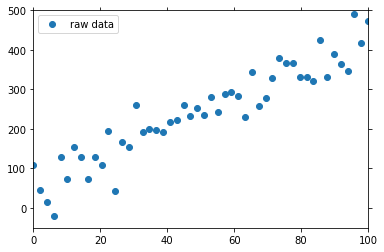

In [3]:
raw = psy.plot.lineplot(
    ds, name='y', coord='x', linewidth=0, marker='o', legendlabels='raw data', 
    legend='upper left')

The visualization of the fit is straight forward using the ``linreg`` plot method:

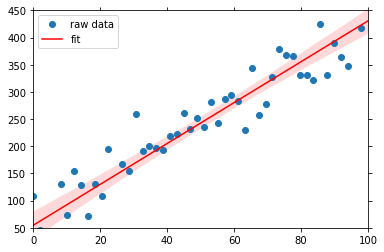

In [4]:
fit = psy.plot.linreg(ds, ax=raw.plotters[0].ax, name='y', coord='x', 
                      legendlabels='fit', color='red')
fit.share(raw[0], keys='legend')
fit.show()

The shaded red area displays the 95% confidence interval. To access the data for the fit, just use the ``plot_data`` attribute:

In [5]:
data = fit[0].psy.plotter.plot_data
data[0]

<xarray.DataArray 'y' (variable: 3, x: 100)>
array([[ 54.76497579,  58.56389947,  62.36282315,  66.16174684,
         69.96067052,  73.7595942 ,  77.55851788,  81.35744156,
         85.15636525,  88.95528893,  92.75421261,  96.55313629,
        100.35205998, 104.15098366, 107.94990734, 111.74883102,
        115.54775471, 119.34667839, 123.14560207, 126.94452575,
        130.74344944, 134.54237312, 138.3412968 , 142.14022048,
        145.93914416, 149.73806785, 153.53699153, 157.33591521,
        161.13483889, 164.93376258, 168.73268626, 172.53160994,
        176.33053362, 180.12945731, 183.92838099, 187.72730467,
        191.52622835, 195.32515204, 199.12407572, 202.9229994 ,
        206.72192308, 210.52084677, 214.31977045, 218.11869413,
        221.91761781, 225.71654149, 229.51546518, 233.31438886,
        237.11331254, 240.91223622, 244.71115991, 248.51008359,
        252.30900727, 256.10793095, 259.90685464, 263.70577832,
        267.504702  , 271.30362568, 275.10254937, 278.90147305,
        282.70039673, 286.49932041, 290.29824409, 294.09716778,
        297.89609146, 301.69501514, 305.49393882, 309.29286251,
        313.09178619, 316.89070987, 320.68963355, 324.48855724,
        328.28748092, 332.0864046 , 335.88532828, 339.68425197,
        343.48317565, 347.28209933, 351.08102301, 354.8799467 ,
...
        148.56495526, 152.09265379, 155.62118214, 159.22606374,
        162.80468297, 166.38238382, 169.957866  , 173.46143152,
        177.05317869, 180.5626479 , 184.15739905, 187.65169393,
        190.98013265, 194.62539725, 198.2876215 , 201.71682994,
        205.23916161, 208.72806788, 212.34462804, 215.98483278,
        219.48374135, 222.94882843, 226.49417756, 230.04641654,
        233.66579447, 237.33317334, 240.88961836, 244.50163135,
        248.18678147, 251.99588276, 255.83174871, 259.63139833,
        263.4520058 , 267.24317121, 271.10969689, 274.80839997,
        278.71036652, 282.4911252 , 286.28705686, 290.14121355,
        294.19861456, 298.0364276 , 301.87388249, 305.74045633,
        309.69622978, 313.68602951, 317.74431374, 321.54724362,
        325.37107354, 329.47685294, 333.65443914, 337.667879  ,
        341.93110814, 346.02819891, 350.0246535 , 354.02099378,
        358.01191587, 362.15460212, 366.31610685, 370.37047903,
        374.69461746, 378.97807256, 383.18805856, 387.39143462,
        391.32028253, 395.42116266, 399.36736496, 403.31108337,
        407.25480178, 411.413234  , 415.5980826 , 419.62755386,
        423.6853237 , 427.78743814, 431.97291396, 436.16224307,
        440.35857509, 444.55556799, 448.74941448, 452.94038193]])
Coordinates:
  * x         (x) float64 0.0 1.01 2.02 3.03 4.04 ... 96.97 97.98 98.99 100.0
  * variable  (variable) <U7 'y' 'min_err' 'max_err'
Attributes:
    slope:      3.760934445543529
    intercept:  54.76497578807013
    rsquared:   0.87892810424984

You see, that there are new attributes, ``rsquared``, ``intercept`` and ``slope``, the characteristics of the fit.
As always with the dataset attributes in ``psyplot``, you can visualize them, for example in the legend:

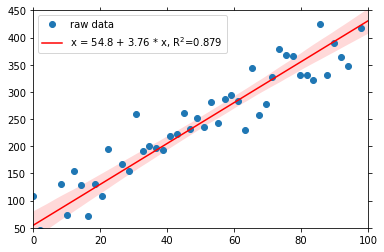

In [6]:
fit.update(legendlabels='%(yname)s = %(intercept).3g + %(slope).3g * %(xname)s, R$^2$=%(rsquared).3g')
fit.show()

To improve the fit, we can also force the line to go through a given fix point. For example here, we know, that the
fit crosses the y-line at 30:

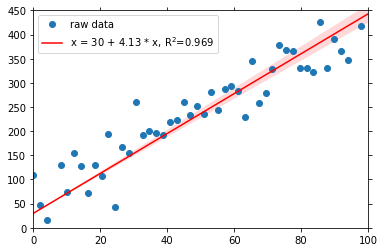

In [7]:
fit.update(fix=30)
fit.show()

That works for any other point as well. E.g. we also know, that the line goes through ``y = 4 * 10 + 30 = 70``:

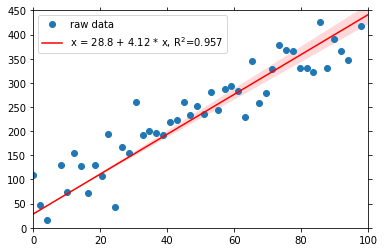

In [8]:
fit.update(fix=[(10, 70)])
fit.show()

For more informations, look into the formatoptions of the ``regression`` group

In [9]:
fit.summaries('regression')

xrange
    Specify the range for the fit to use for the x-dimension
yrange
    Specify the range for the fit to use for the y-dimension
line_xlim
    Specify how wide the range for the plot should be
p0
    Initial parameters for the :func:`scipy.optimize.curve_fit` function
fit
    Choose the linear fitting method
fix
    Force the fit to go through a given point
nboot
    Set the number of bootstrap resamples for the confidence interval
ci
    Draw a confidence interval
ideal
    Draw an ideal line of the fit


In [10]:
psy.close('all')